In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/samplesuper-store/SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.duplicated().sum()

17

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

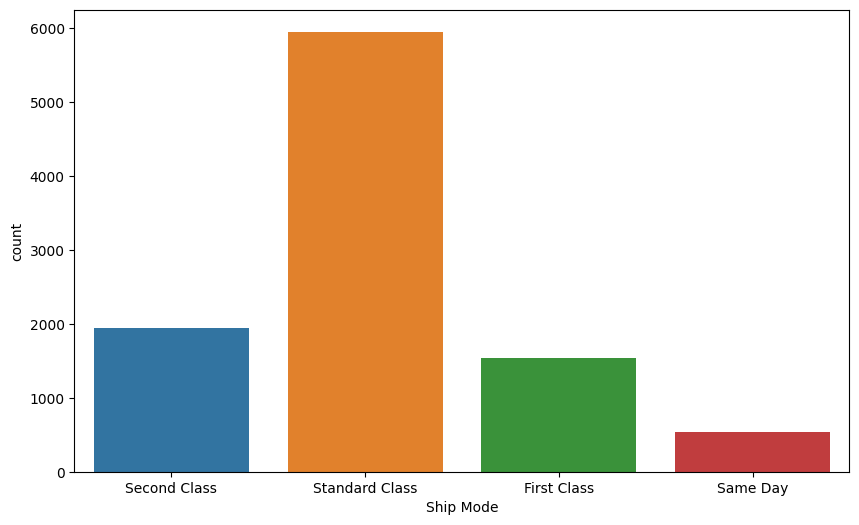

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x="Ship Mode",data=df)
plt.show()

* Sales and Profit are Moderately Correlated

* Discount and Profit are Negatively Correlated

* Quantity and Profit are less Moderately Correlated

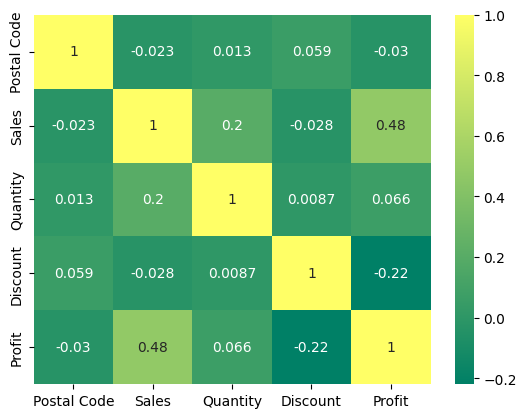

In [20]:
corr=df[["Postal Code","Sales","Quantity","Discount","Profit"]].corr()
sns.heatmap(corr,annot=True,cmap="summer")
plt.show()

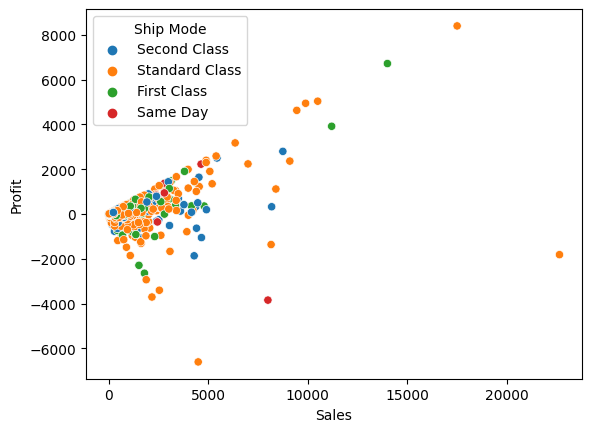

In [23]:
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Ship Mode")
plt.show()

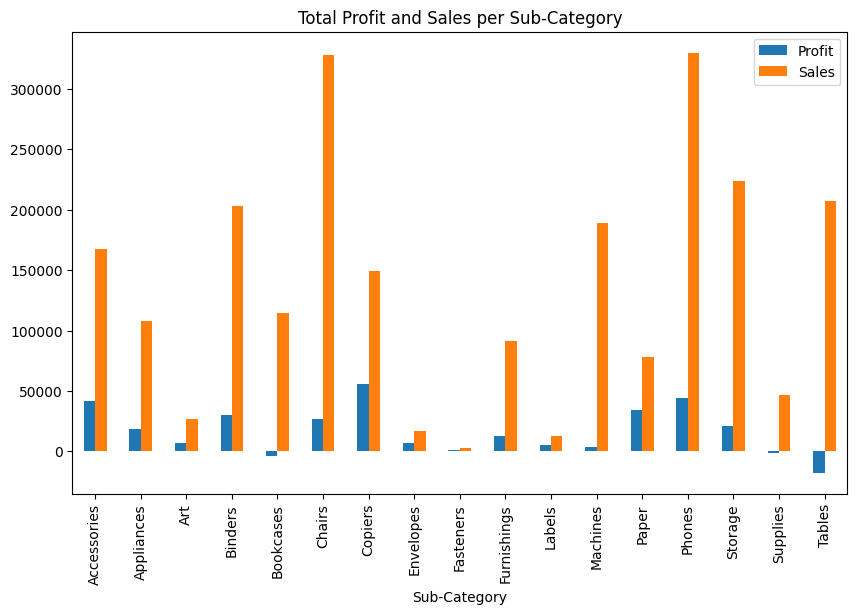

In [27]:
grouped_data = df.groupby('Sub-Category')[['Profit', 'Sales']].agg('sum')
ax = grouped_data.plot.bar(figsize=(10,6))
plt.title('Total Profit and Sales per Sub-Category')
ax.legend(['Profit', 'Sales'])

plt.show()

In [28]:
df["Segment"].value_counts()

Segment
Consumer       5183
Corporate      3015
Home Office    1779
Name: count, dtype: int64

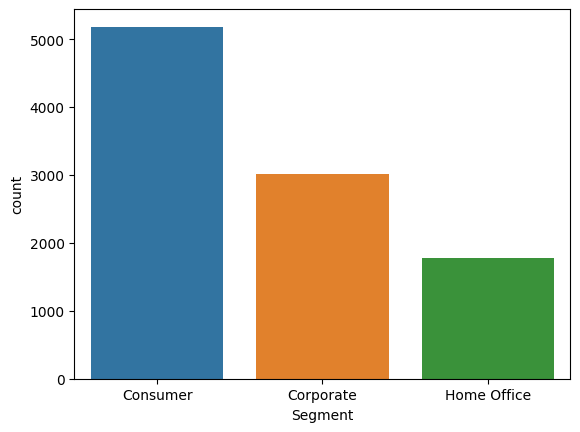

In [29]:
sns.countplot(x="Segment",data=df)
plt.show()

In [33]:
df["City"].value_counts()

City
New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

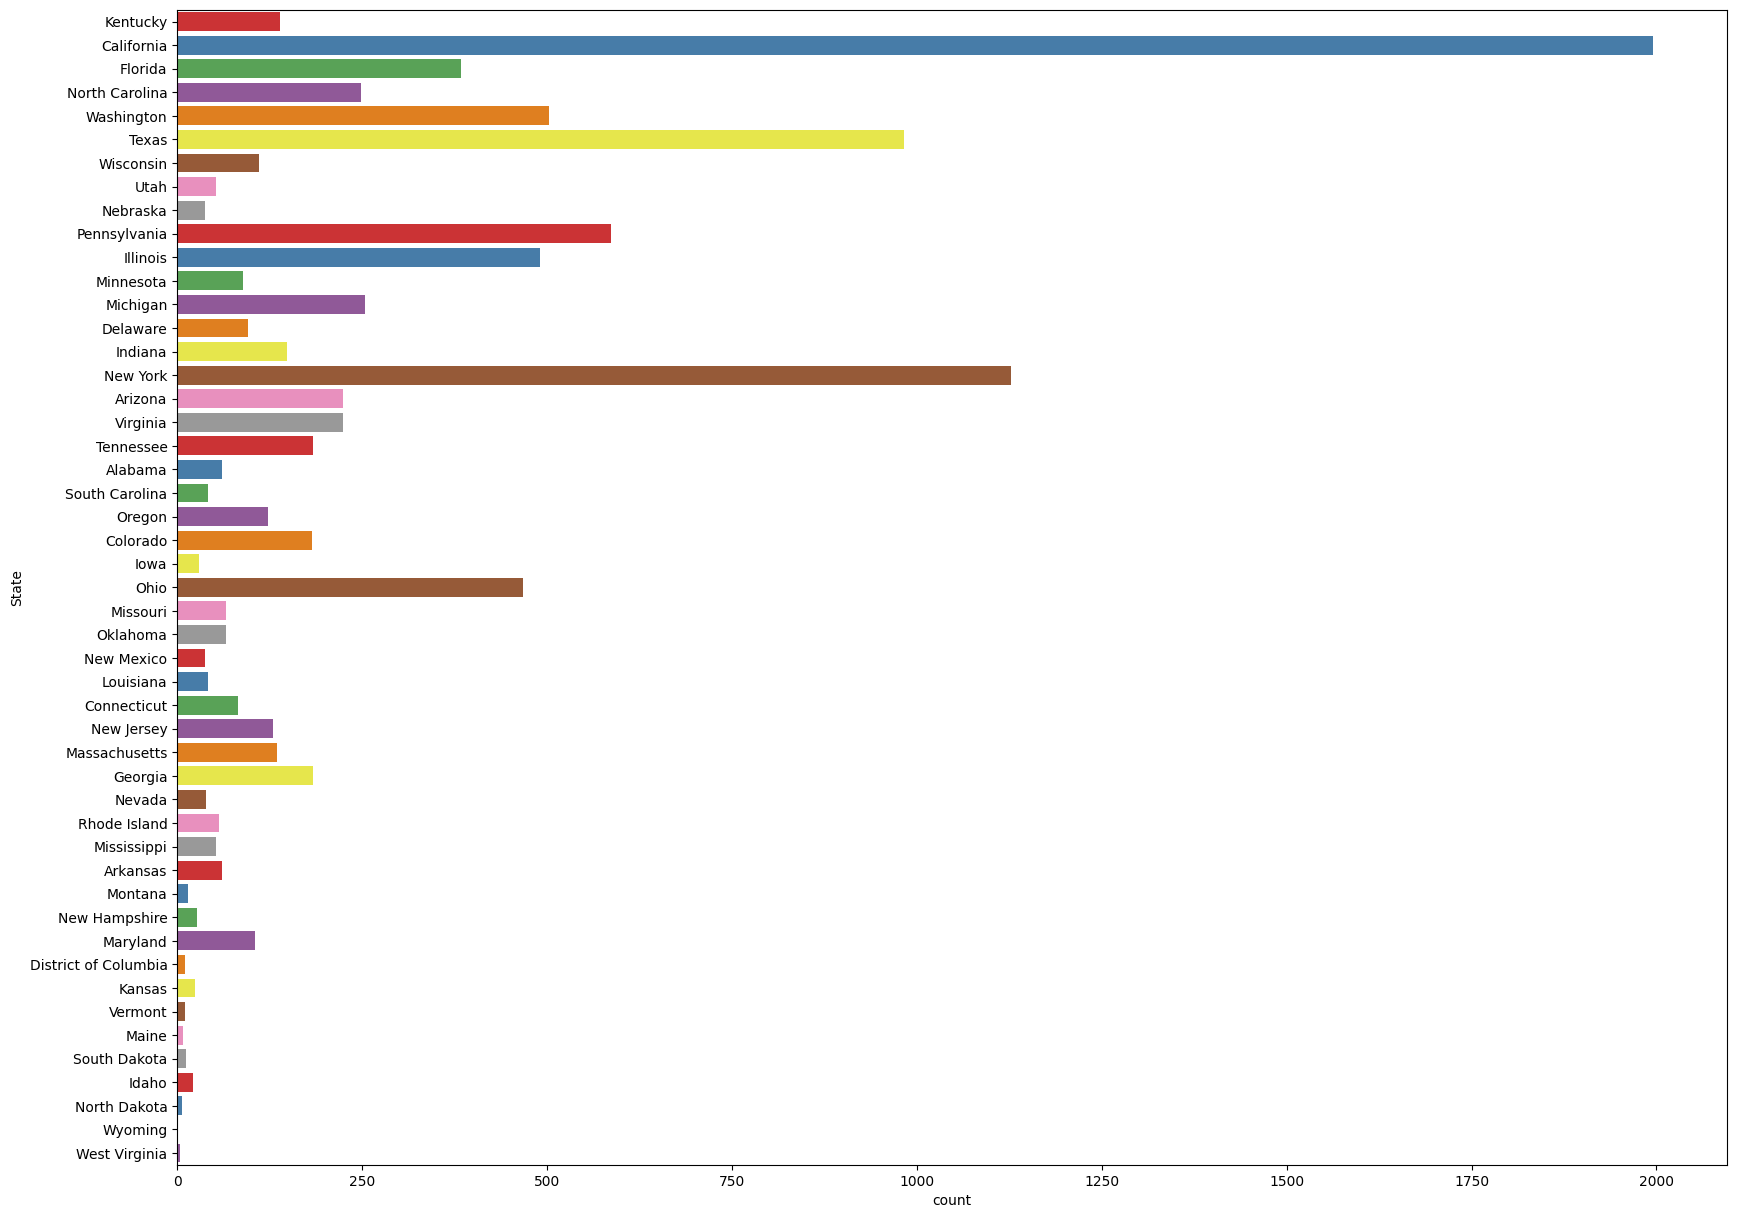

In [34]:
plt.figure(figsize=(20,15))
sns.countplot(y="State",data=df,palette="Set1")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

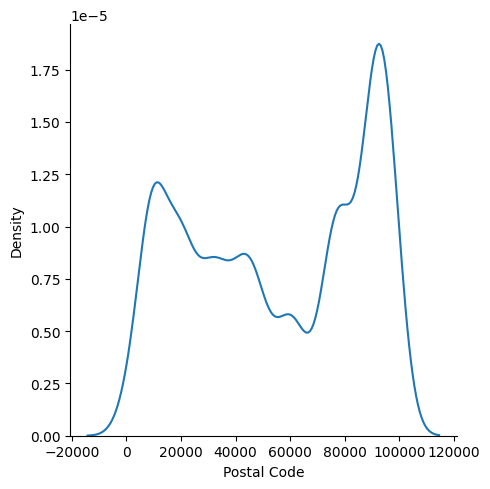

In [36]:
plt.figure(figsize=(10,6))
sns.displot(data=df, x="Postal Code", kind="kde")
plt.show()

In [37]:
df['Region'].value_counts()

Region
West       3193
East       2845
Central    2319
South      1620
Name: count, dtype: int64

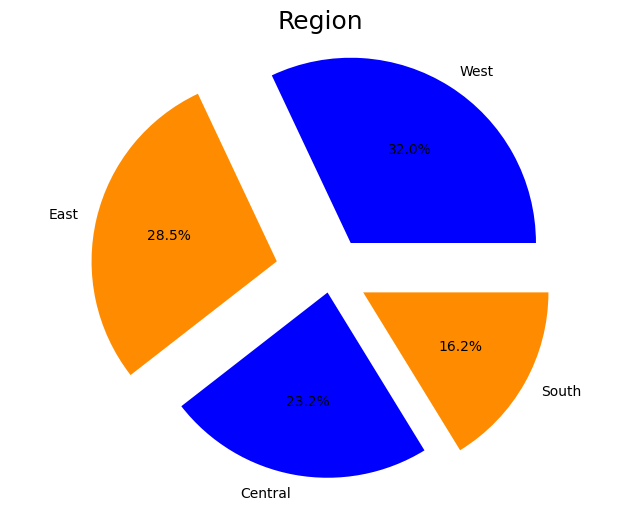

In [39]:
plt.figure(figsize=(8,6))
myexplode = [0.2, 0.3,0.1,0.2]
region= df['Region'].value_counts()
plt.pie(region.values, labels=region.index, autopct= '%1.1f%%', colors=['blue','darkorange'],explode=myexplode)
plt.axis("equal")
plt.title('Region',fontsize=18)
plt.show()

In [40]:
df["Category"].value_counts()

Category
Office Supplies    6012
Furniture          2118
Technology         1847
Name: count, dtype: int64

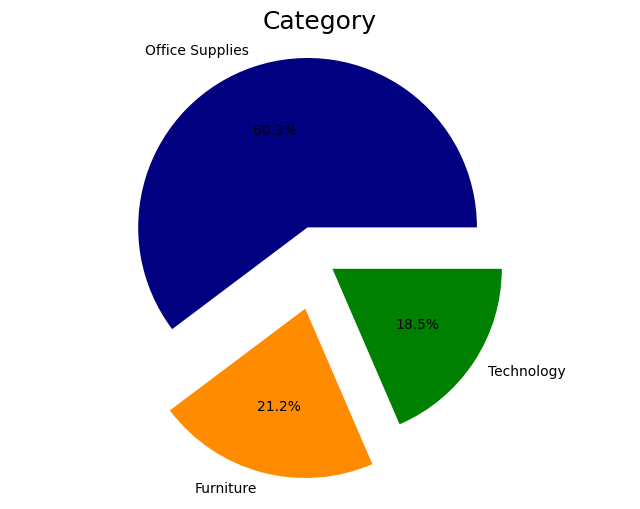

In [42]:
plt.figure(figsize=(8,6))
myexplode = [0.2, 0.3,0.1]
cat= df['Category'].value_counts()
plt.pie(cat.values, labels=cat.index, autopct= '%1.1f%%', colors=['navy','darkorange',"green"],explode=myexplode)
plt.axis("equal")
plt.title('Category',fontsize=18)
plt.show()

In [43]:
df["Sub-Category"].value_counts()

Sub-Category
Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

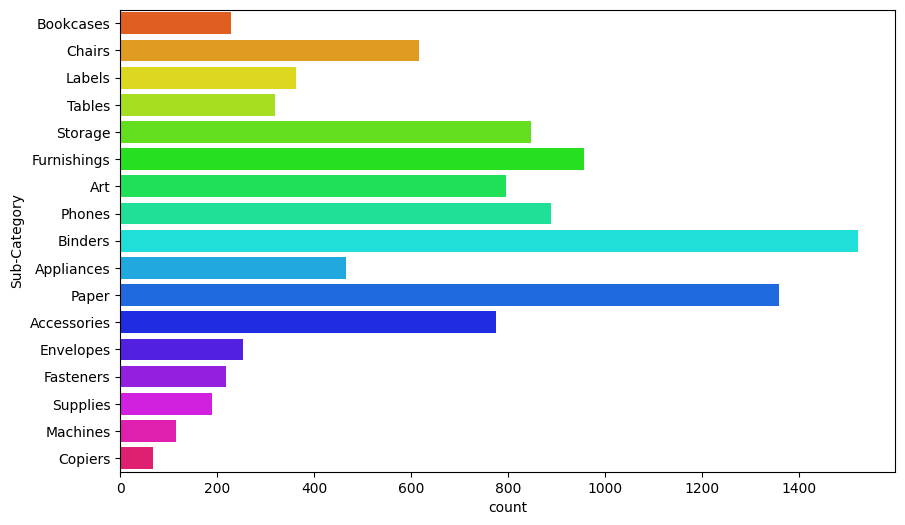

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(y="Sub-Category",data=df,palette="hsv")
plt.show()

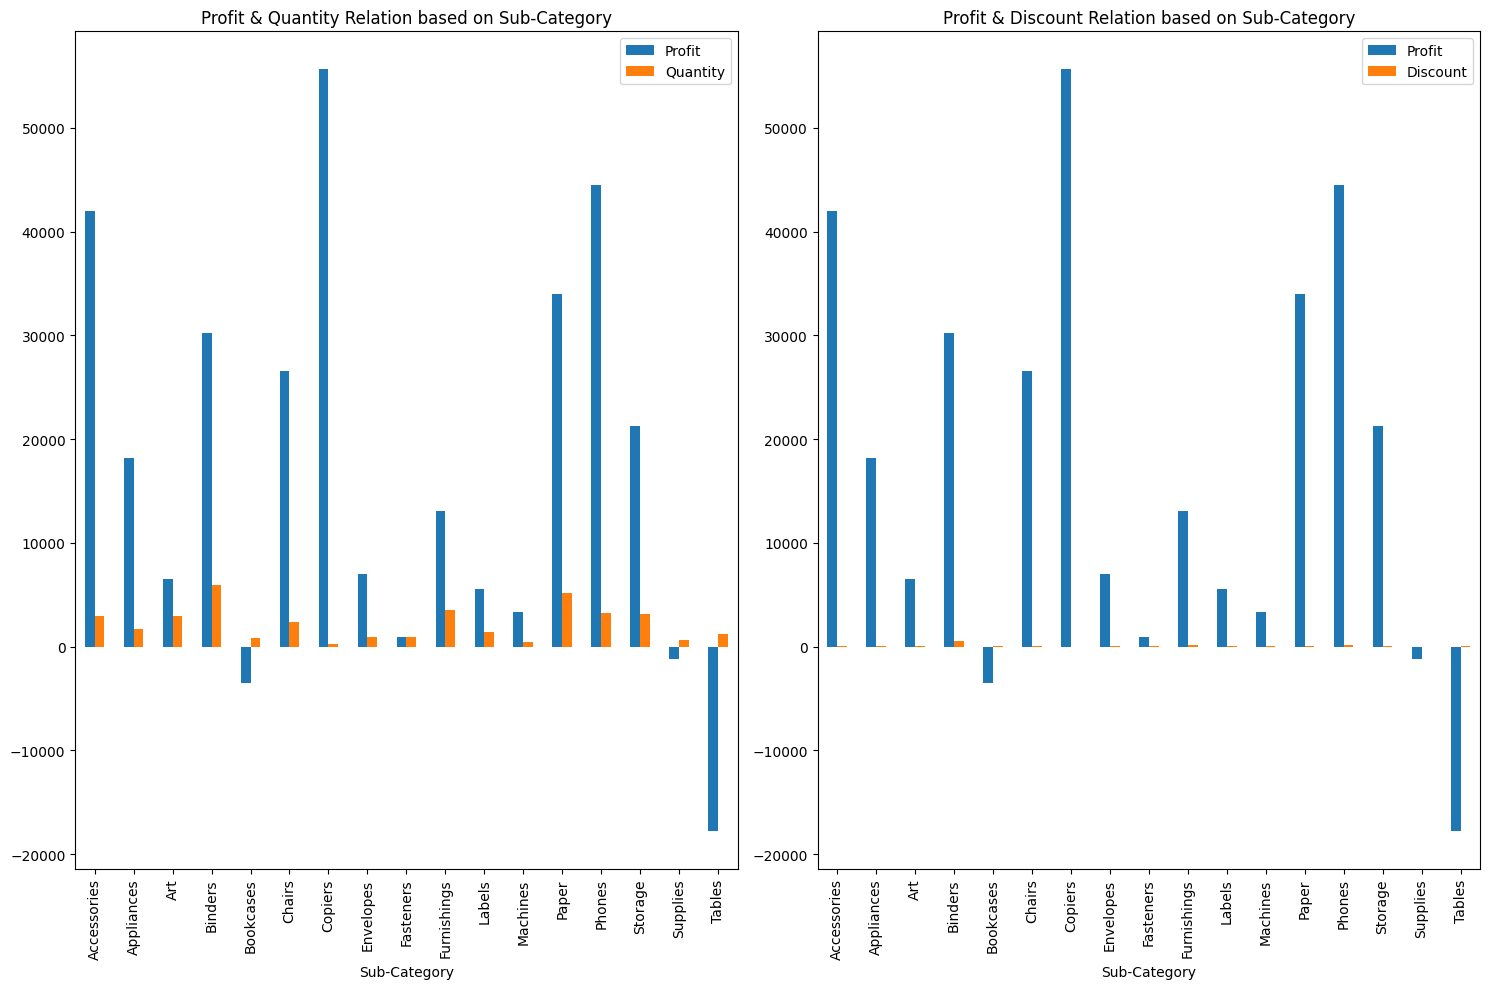

In [48]:


fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# First subplot: Profit & Quantity Relation based on Sub-Category
df.groupby('Sub-Category')[['Profit', 'Quantity']].agg('sum').plot(kind='bar', ax=axes[0])
axes[0].set_title('Profit & Quantity Relation based on Sub-Category')

# Second subplot: Profit & Discount Relation based on Sub-Category
df.groupby('Sub-Category')[['Profit', 'Discount']].agg('sum').plot(kind='bar', ax=axes[1])
axes[1].set_title('Profit & Discount Relation based on Sub-Category')

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


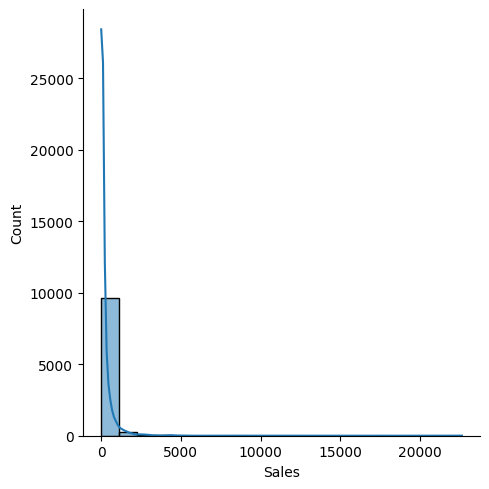

In [50]:
sns.displot(data=df, x="Sales", kde=True,bins=20)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


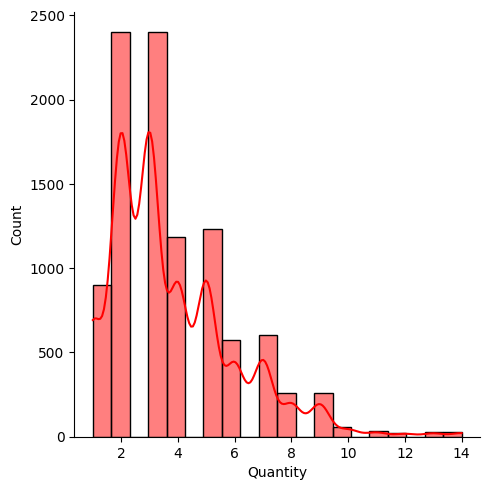

In [52]:
sns.displot(data=df, x="Quantity", kde=True,bins=20,color="red")

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


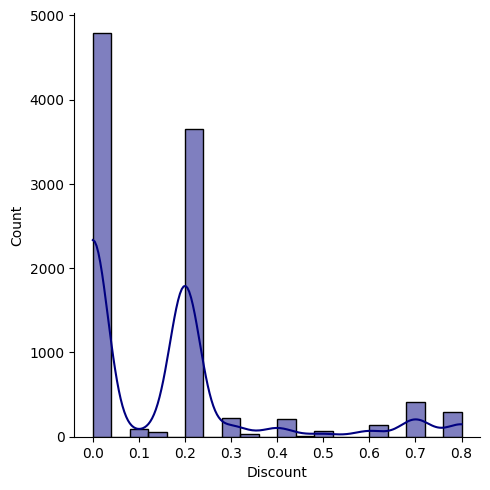

In [53]:
sns.displot(data=df, x="Discount", kde=True,bins=20,color="navy")

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


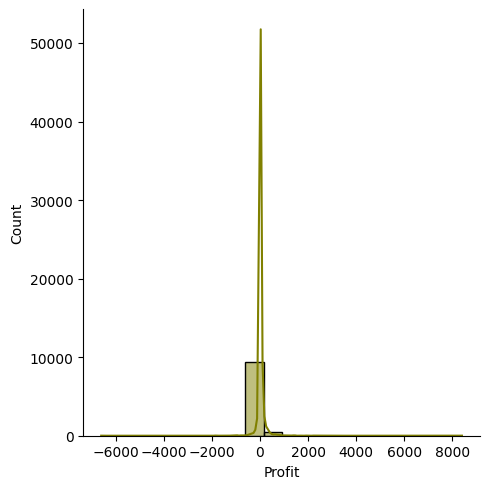

In [54]:
sns.displot(data=df, x="Profit", kde=True,bins=20,color="olive")

plt.show()

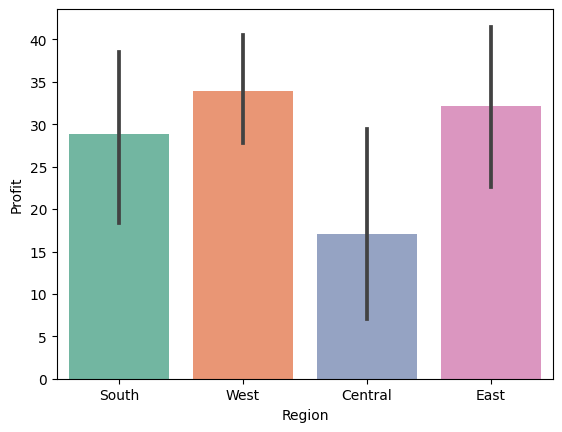

In [56]:
sns.barplot(x='Region',y='Profit',data=df,palette="Set2")
plt.show()

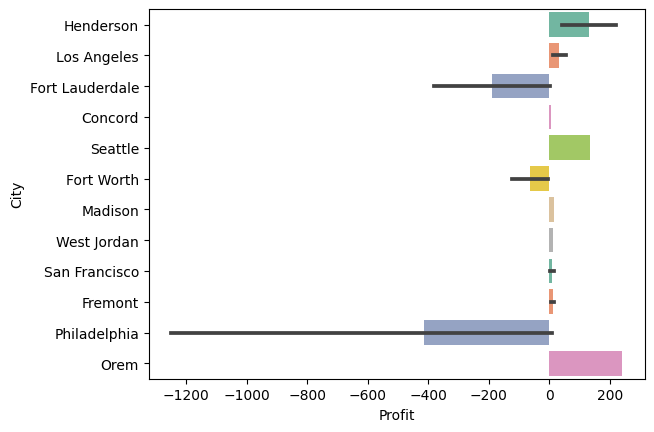

In [62]:
sns.barplot(y='City',x='Profit',data=df[: 30],palette="Set2")
plt.show()

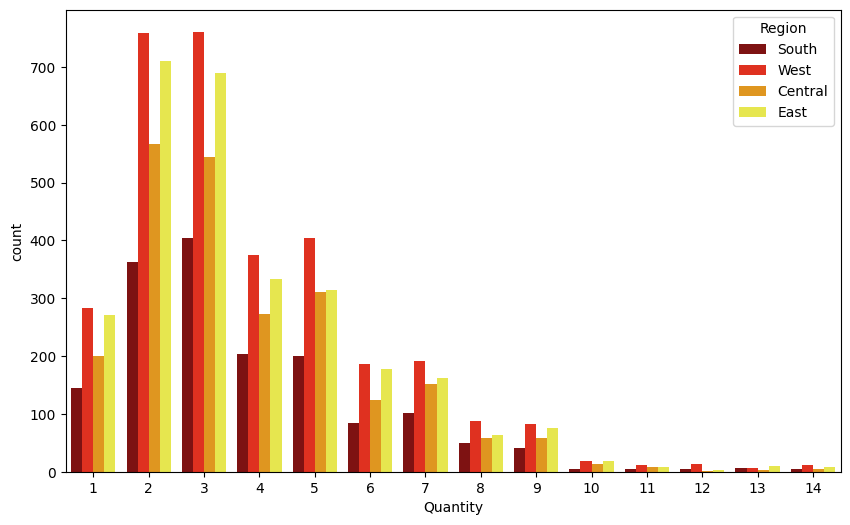

In [64]:
plt.figure(figsize=(10,6))

sns.countplot(x="Quantity",data=df,hue="Region",palette="hot")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

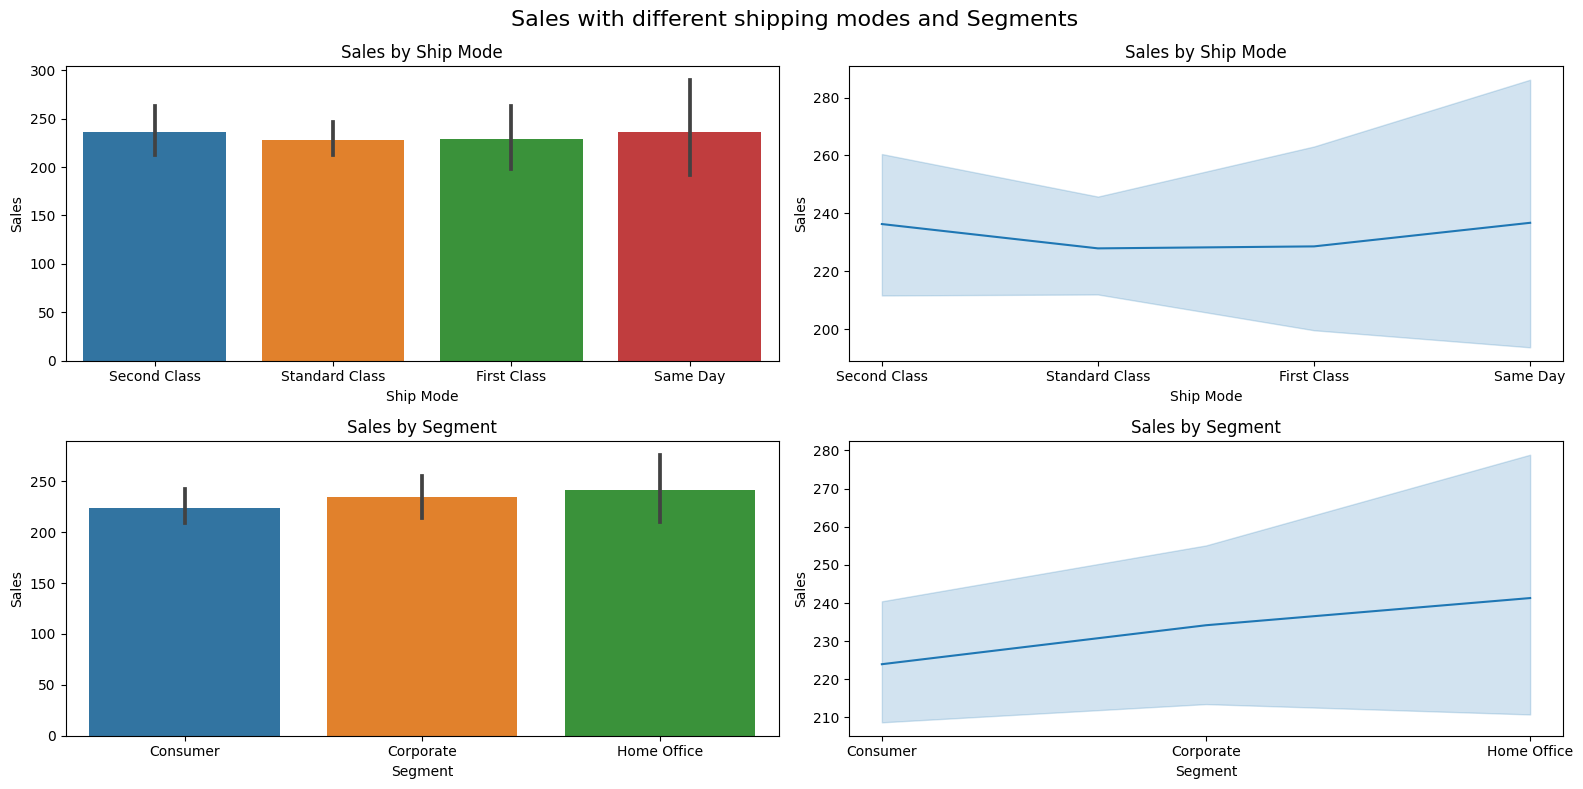

In [66]:


# Creating the figure and subplots
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Sales with different shipping modes and Segments", fontsize=16)

# First subplot: Bar plot of Sales by Ship Mode
ax1 = fig.add_subplot(221)
sns.barplot(x=df['Ship Mode'], y=df['Sales'], ax=ax1, dodge=False)
ax1.set_title('Sales by Ship Mode')

# Second subplot: Line plot of Sales by Ship Mode
ax2 = fig.add_subplot(222)
sns.lineplot(x=df['Ship Mode'], y=df['Sales'], ax=ax2)
ax2.set_title('Sales by Ship Mode')

# Third subplot: Bar plot of Sales by Segment
ax3 = fig.add_subplot(223)
sns.barplot(x=df['Segment'], y=df['Sales'], ax=ax3)
ax3.set_title('Sales by Segment')

# Fourth subplot: Line plot of Sales by Segment
ax4 = fig.add_subplot(224)
sns.lineplot(x=df['Segment'], y=df['Sales'], ax=ax4)
ax4.set_title('Sales by Segment')

plt.tight_layout()
plt.show()


# Conclusion

* Correlation Analysis: Profit & Sales, Quantity & Sales show positive relationships.

* Discount Strategy: More discounts offered on Office Supplies & Furniture.

* Central Region Strategy: Despite high discounts, low output in quantity. Optimize discount strategies.

* Product Allocation: Shift quantity from Office Supplies to Furniture for better sales.

* Demand Analysis: Most products in demand have quantities in the range 2-4.

* Shipping Impact: Minimal impact of shipping mode on sales.

* Focus Areas: Technology sub-category, Phones, and Chairs are high-selling and profitable.

* Product Bundling: Bundle high-selling products with less profitable ones.

* Loss-Making Products: Consider dropping or changing suppliers for products like Bookcases and Tables.

* Customer Targeting: Focus on Consumer and Corporate segments, especially in top cities, with special promotions and bundles.